In [1]:
import d2lzh as d2l
from mxnet import autograd,gluon,init,nd
from mxnet.gluon import data as gdata,loss as gloss, nn

In [2]:
n_train,n_test,num_inputs = 20,100,200
true_w,true_b = nd.ones((num_inputs,1))*0.01,0.05
features = nd.random.normal(shape=(n_train+n_test,num_inputs))
labels = nd.dot(features,true_w)+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)
train_features,test_features = features[:n_train,:],features[n_train:,:]
train_labels,test_labels =  labels[:n_train],labels[n_train:]

In [3]:
# 初始化模型参数
def init_params():
    w = nd.random.normal(scale=1,shape=(num_inputs,1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return[w,b]

In [4]:
# 定义L2范数惩罚项
def l2_penalty(w):
    return (w**2).sum()/2

In [7]:
# 定义训练和测试
batch_size,num_epochs,lr = 1, 100, 0.003
net, loss = d2l.linreg,d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels), batch_size, shuffle=True)
def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # 添加了L2范数惩罚项
                l = loss(net(X,w,b), y)+lambd*l2_penalty(w)
            l.backward()
            d2l.sgd([w,b],lr,batch_size)
        train_ls.append(loss(net(train_features,w,b),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features,w,b),test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs+1),train_ls,'epochs','loss',range(1,num_epochs+1),test_ls,['train','test'])
    print('L2 norm of w:', w.norm().asscalar())

##  lambd=0 没有使用权重衰减，经典的过拟合现象

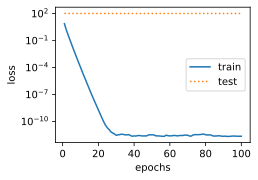

L2 norm of w: 12.904753


In [8]:
fit_and_plot(lambd=0)

## 使用权重衰减

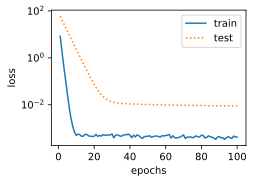

L2 norm of w: 0.042496957


In [10]:
fit_and_plot(lambd=3)